1.
En una cadena de desintegración radiactiva, el elemento A
 se desintegra en el elemento B
, que a su vez se desintegra en C
, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es 90Sr
, que se desintegra en 90Y
, que a su vez se desintegra a a 90Zr
. La vida media de 90Sr
 es de 28.78 años, y la vida media de 90Y
 es de 2.67 días. 90Zr
 es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

dNSrdt=−λSrNSr
dNYdt=−λYNY−dNSrdt
Grafique la actividad relativa de una muestra de 90Sr
 y otra gráfica de 90Y
 en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

Nota: Recuerde que λ=ln2t1/2
 con t1/2
 el tiempo de vida media.

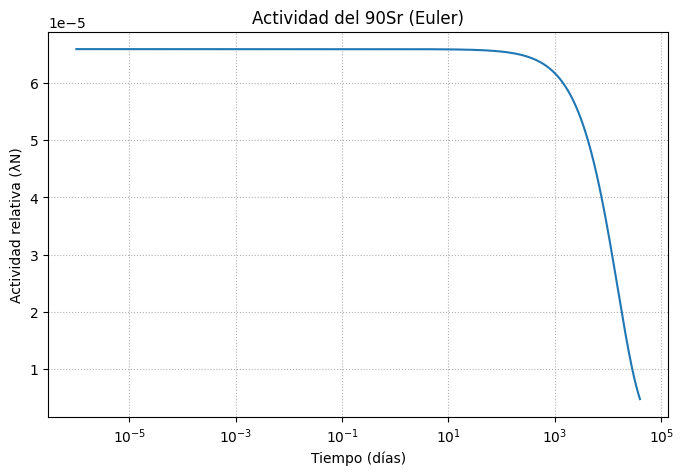

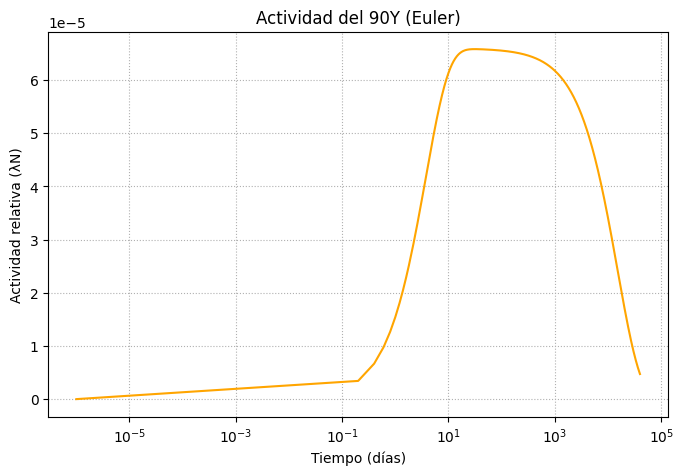

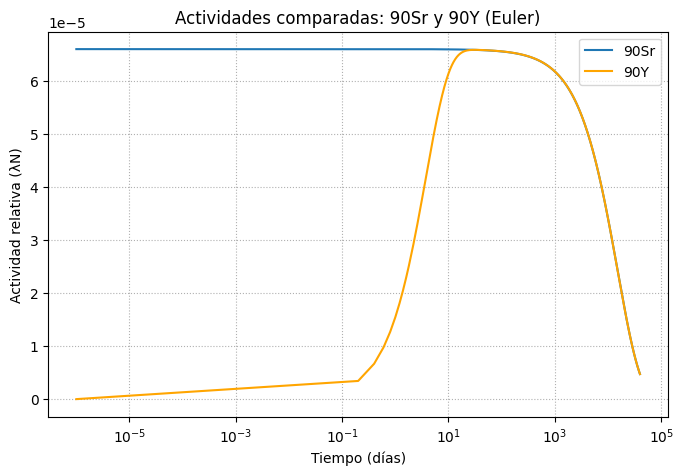

In [1]:
import numpy as np
import matplotlib.pyplot as plt


t12_Sr_years = 28.78
days_per_year = 365.25
t12_Sr = t12_Sr_years * days_per_year
t12_Y  = 2.67


lambda_Sr = np.log(2) / t12_Sr
lambda_Y  = np.log(2) / t12_Y


N0_Sr = 1.0
N0_Y  = 0.0


t_max = 40000
dt = 0.2
n_steps = int(t_max / dt) + 1


t = np.linspace(1e-6, t_max, n_steps)
N_Sr = np.zeros_like(t)
N_Y  = np.zeros_like(t)


N_Sr[0] = N0_Sr
N_Y[0]  = N0_Y


for i in range(n_steps - 1):
    dN_Sr = -lambda_Sr * N_Sr[i]
    dN_Y  =  lambda_Sr * N_Sr[i] - lambda_Y * N_Y[i]

    N_Sr[i+1] = N_Sr[i] + dN_Sr * dt
    N_Y[i+1]  = N_Y[i]  + dN_Y  * dt


A_Sr = lambda_Sr * N_Sr
A_Y  = lambda_Y  * N_Y


plt.figure(figsize=(8,5))
plt.plot(t, A_Sr, label="90Sr")
plt.xlabel("Tiempo (días)")
plt.ylabel("Actividad relativa (λN)")
plt.title("Actividad del 90Sr (Euler)")
plt.xscale("log")
plt.grid(True, which="both", ls=":")
plt.show()


plt.figure(figsize=(8,5))
plt.plot(t, A_Y, label="90Y", color="orange")
plt.xlabel("Tiempo (días)")
plt.ylabel("Actividad relativa (λN)")
plt.title("Actividad del 90Y (Euler)")
plt.xscale("log")
plt.grid(True, which="both", ls=":")
plt.show()


plt.figure(figsize=(8,5))
plt.plot(t, A_Sr, label="90Sr")
plt.plot(t, A_Y, label="90Y", color="orange")
plt.xlabel("Tiempo (días)")
plt.ylabel("Actividad relativa (λN)")
plt.title("Actividades comparadas: 90Sr y 90Y (Euler)")
plt.xscale("log")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()


Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

image.png

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea I
 la corriente que fluye a través de R
 y hacia el capacitor, y sea Q
 la carga en el capacitor. Entonces:

IR=Vin−Vout,Q=CVout,I=dQdt
Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que Vin−Vout=RC(dVoutdt)
 , o equivalentemente

dVoutdt=1RC(Vin−Vout).
Escriba un programa para resolver esta ecuación para Vout(t)
 usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

Vin(t)={1−1si ⌊2t⌋ es par,si ⌊2t⌋ es impar,
donde ⌊x⌋
 significa x
 redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde t=0
 hasta t=10
 cuando RC=0.01,0.1
 y 1
, con la condición inicial Vout(0)=0
.


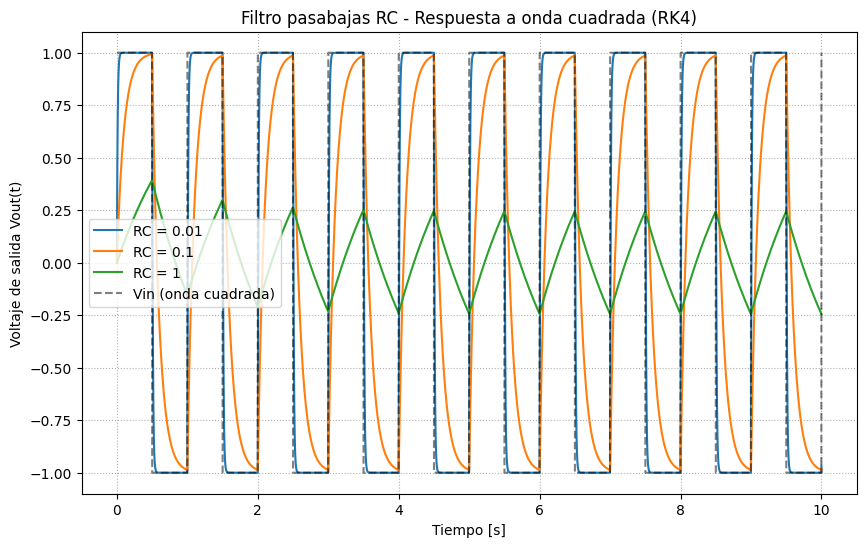

In [2]:



def Vin(t):

    return 1 if (int(np.floor(2*t)) % 2 == 0) else -1


def f(t, Vout, RC):
    return (1/RC) * (Vin(t) - Vout)


def rk4(f, t0, V0, tf, dt, RC):
    t_vals = np.arange(t0, tf+dt, dt)
    V_vals = np.zeros_like(t_vals)
    V_vals[0] = V0

    for i in range(len(t_vals)-1):
        t = t_vals[i]
        V = V_vals[i]

        k1 = f(t, V, RC)
        k2 = f(t + dt/2, V + dt*k1/2, RC)
        k3 = f(t + dt/2, V + dt*k2/2, RC)
        k4 = f(t + dt, V + dt*k3, RC)

        V_vals[i+1] = V + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t_vals, V_vals


RC_values = [0.01, 0.1, 1]
t0, tf, dt = 0, 10, 0.001
V0 = 0

plt.figure(figsize=(10,6))
for RC in RC_values:
    t, Vout = rk4(f, t0, V0, tf, dt, RC)
    plt.plot(t, Vout, label=f"RC = {RC}")


Vin_vals = np.array([Vin(ti) for ti in t])
plt.plot(t, Vin_vals, 'k--', alpha=0.5, label="Vin (onda cuadrada)")

plt.title("Filtro pasabajas RC - Respuesta a onda cuadrada (RK4)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje de salida Vout(t)")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()


La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población dPdt
 con la población actual, P
, dada una tasa de crecimiento, r
, y una capacidad de carga, K
. La ecuación logística se puede expresar como

dPdt=rP(1−PK).
Escriba una función my_logistic_eq(t, P, r, K) que represente la ecuación logística con un retorno de dP. Tenga en cuenta que este formato permite que my_logistic_eq se utilice como un argumento de entrada para solve_ivp. Suponga que los argumentos dP, t, P, r y K son todos escalares, y dP es el valor dPdt
 dado r
, P
 y K
. Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

P(t)=KP0ertK+P0(ert−1)
donde P0
 es la población inicial.

Grafique P
 vs t
 utilizando el método de Euler y de RK4, comparando con la solución analítica.
Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

Error relativo medio (Euler): 3.82e-03
Error relativo medio (RK4):   6.26e-09


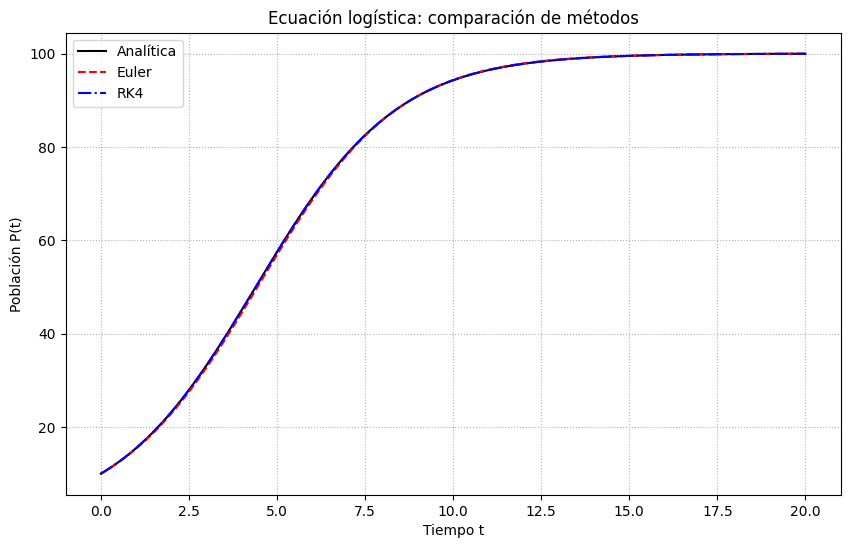

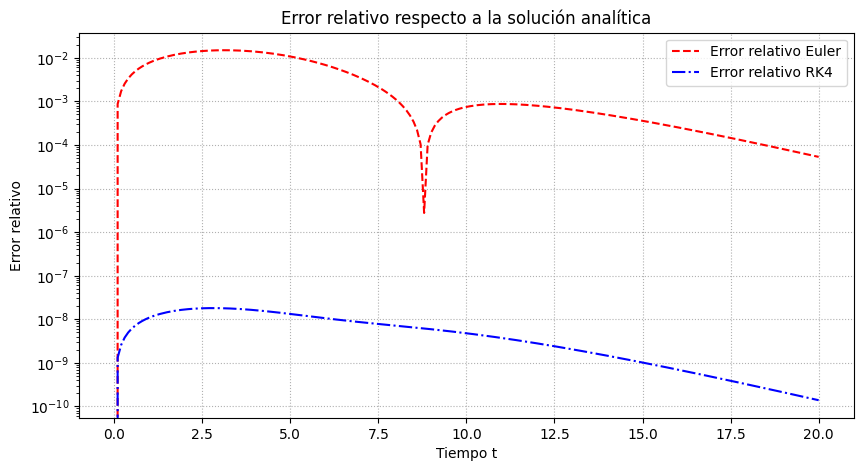

In [3]:

def my_logistic_eq(t, P, r, K):
    return r * P * (1 - P / K)


def logistic_solution(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))


def euler(f, t0, tf, dt, P0, r, K):
    t_vals = np.arange(t0, tf+dt, dt)
    P_vals = np.zeros_like(t_vals)
    P_vals[0] = P0

    for i in range(len(t_vals)-1):
        P_vals[i+1] = P_vals[i] + dt * f(t_vals[i], P_vals[i], r, K)

    return t_vals, P_vals


def rk4(f, t0, tf, dt, P0, r, K):
    t_vals = np.arange(t0, tf+dt, dt)
    P_vals = np.zeros_like(t_vals)
    P_vals[0] = P0

    for i in range(len(t_vals)-1):
        t = t_vals[i]
        P = P_vals[i]

        k1 = f(t, P, r, K)
        k2 = f(t + dt/2, P + dt*k1/2, r, K)
        k3 = f(t + dt/2, P + dt*k2/2, r, K)
        k4 = f(t + dt, P + dt*k3, r, K)

        P_vals[i+1] = P + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t_vals, P_vals


r = 0.5
K = 100
P0 = 10
t0, tf, dt = 0, 20, 0.1


t_euler, P_euler = euler(my_logistic_eq, t0, tf, dt, P0, r, K)
t_rk4, P_rk4     = rk4(my_logistic_eq, t0, tf, dt, P0, r, K)
t_analytic       = np.linspace(t0, tf, 1000)
P_analytic       = logistic_solution(t_analytic, P0, r, K)


P_exact_on_euler = logistic_solution(t_euler, P0, r, K)
P_exact_on_rk4   = logistic_solution(t_rk4, P0, r, K)


error_euler = np.abs((P_euler - P_exact_on_euler) / P_exact_on_euler)
error_rk4   = np.abs((P_rk4 - P_exact_on_rk4) / P_exact_on_rk4)

print(f"Error relativo medio (Euler): {np.mean(error_euler):.2e}")
print(f"Error relativo medio (RK4):   {np.mean(error_rk4):.2e}")


plt.figure(figsize=(10,6))
plt.plot(t_analytic, P_analytic, 'k-', label="Analítica")
plt.plot(t_euler, P_euler, 'r--', label="Euler")
plt.plot(t_rk4, P_rk4, 'b-.', label="RK4")
plt.xlabel("Tiempo t")
plt.ylabel("Población P(t)")
plt.title("Ecuación logística: comparación de métodos")
plt.legend()
plt.grid(True, ls=":")
plt.show()


plt.figure(figsize=(10,5))
plt.plot(t_euler, error_euler, 'r--', label="Error relativo Euler")
plt.plot(t_rk4, error_rk4, 'b-.', label="Error relativo RK4")
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo")
plt.yscale("log")
plt.title("Error relativo respecto a la solución analítica")
plt.legend()
plt.grid(True, ls=":")
plt.show()


Considera la ecuación de movimiento para el desplazamiento angular u
 de un péndulo rígido no lineal de longitud l
 (donde g
 es la aceleración gravitacional):

u¨=−glsinu,
con las condiciones iniciales:

u(0)=u0,u˙(0)=0.
El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial u0∈[−π,π]
:

T=T02πK(α).
con
T0=2πlg−−√

α=sin2u02
K(α)=∫10dz(1−z2)(1−αz2)−−−−−−−−−−−−−−√.
Halle la solución u(t)
 utilizando el método de Runge Kutta con h=0.001
 y distintos valores de u0=1
 y u0=π/2
.
Grafique T/T0
 en función de u0
 y compare con el resultado analítico

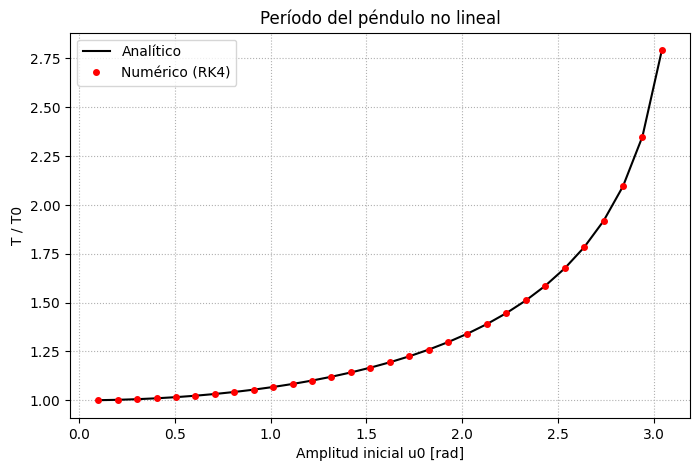

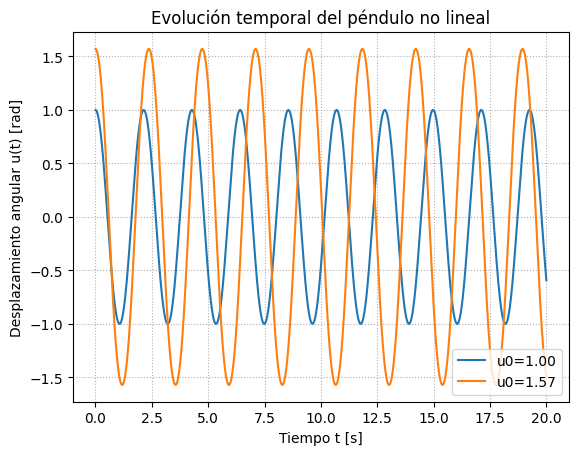

In [4]:

from scipy.integrate import quad


g = 9.81
l = 1.0
T0 = 2*np.pi*np.sqrt(l/g)


def f(t, y):
    u, v = y
    du = v
    dv = -(g/l) * np.sin(u)
    return np.array([du, dv])


def rk4_step(fun, t, y, h):
    k1 = fun(t, y)
    k2 = fun(t + h/2, y + h*k1/2)
    k3 = fun(t + h/2, y + h*k2/2)
    k4 = fun(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def solve(fun, y0, h, t_max):
    t_vals = np.arange(0, t_max, h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0
    for i in range(len(t_vals)-1):
        y_vals[i+1] = rk4_step(fun, t_vals[i], y_vals[i], h)
    return t_vals, y_vals


def periodo_numerico(u0, h=0.001, t_max=20):
    y0 = np.array([u0, 0.0])
    t, y = solve(f, y0, h, t_max)
    u, v = y[:,0], y[:,1]

    cruces = []
    for i in range(1, len(v)):
        if v[i-1] > 0 and v[i] < 0:
            cruces.append(t[i])
    if len(cruces) >= 2:
        return cruces[1] - cruces[0]
    else:
        return np.nan


def periodo_analitico(u0):
    alpha = np.sin(u0/2)**2
    integrand = lambda z: 1.0 / np.sqrt((1-z**2)*(1-alpha*z**2))
    K_val, _ = quad(integrand, 0, 1)
    return T0 * (2/np.pi) * K_val


u0_vals = np.linspace(0.1, np.pi-0.1, 30)
T_num = []
T_an = []

for u0 in u0_vals:
    Tn = periodo_numerico(u0)
    Ta = periodo_analitico(u0)
    T_num.append(Tn/T0)
    T_an.append(Ta/T0)


plt.figure(figsize=(8,5))
plt.plot(u0_vals, T_an, 'k-', label="Analítico")
plt.plot(u0_vals, T_num, 'ro', markersize=4, label="Numérico (RK4)")
plt.xlabel("Amplitud inicial u0 [rad]")
plt.ylabel("T / T0")
plt.title("Período del péndulo no lineal")
plt.legend()
plt.grid(True, ls=":")
plt.show()


for u0 in [1.0, np.pi/2]:
    t, y = solve(f, [u0, 0], 0.001, 20)
    plt.plot(t, y[:,0], label=f"u0={u0:.2f}")
plt.xlabel("Tiempo t [s]")
plt.ylabel("Desplazamiento angular u(t) [rad]")
plt.title("Evolución temporal del péndulo no lineal")
plt.legend()
plt.grid(True, ls=":")
plt.show()


Considere un sistema ecológico aislado donde habitan dos especies: conejos (x
) y zorros (y
). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

dxdt=αx−βxy
dydt=−γy+δxy
Donde:

x(t)
 representa la población de conejos en el tiempo t
y(t)
 representa la población de zorros en el tiempo t
α
 = 0.8 (tasa de reproducción de los conejos)
β
 = 0.04 (tasa de depredación de conejos por zorros)
γ
 = 0.3 (tasa de mortalidad natural de los zorros)
δ
 = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)
Condiciones iniciales:

x(0)
 = 50 (población inicial de conejos)
y(0)
 = 20 (población inicial de zorros)
a) Implemente el método de Euler para resolver este sistema con un paso temporal de h
 = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

b) Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

c) Compare los resultados de Euler y RK4 mediante:

Gráficas de la evolución temporal de ambas poblaciones
Diagrama de fase (x
 vs y
)
Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia
d) Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal (h
 = 0.5, h
 = 0.05). ¿Qué observa? Explique por qué ocurre.

e) Investigue cómo las variaciones en los parámetros α
, β
, γ
 y δ
 afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

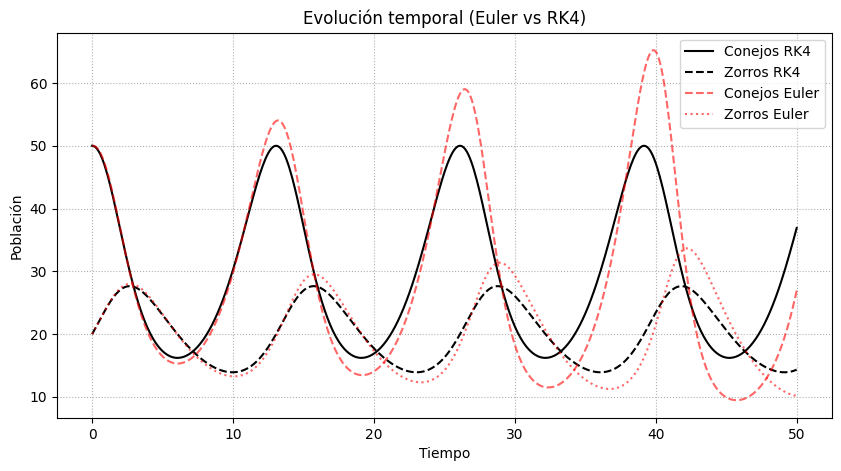

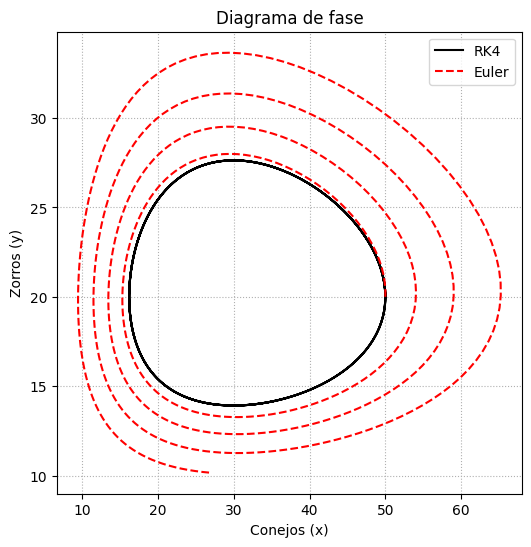

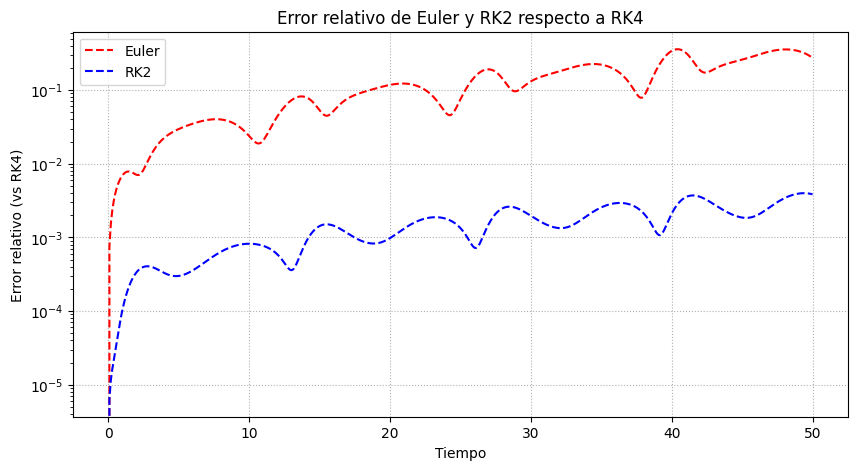

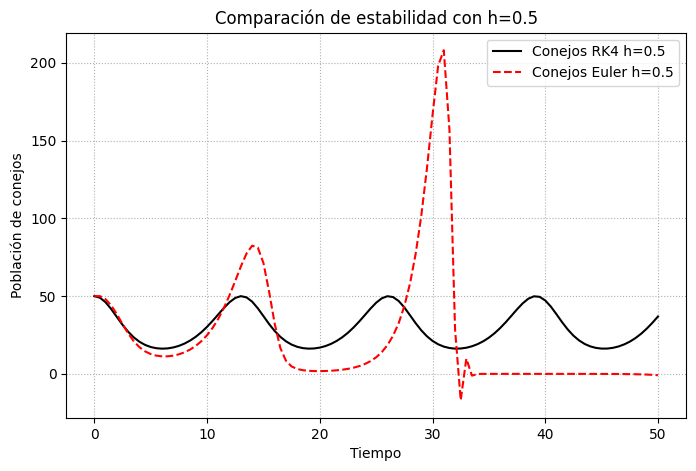

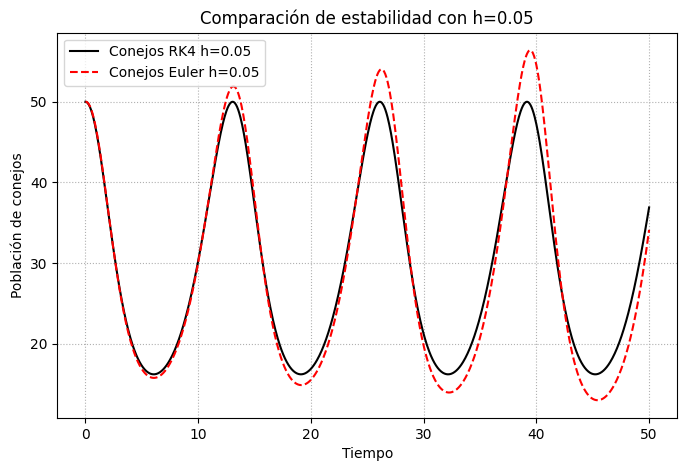

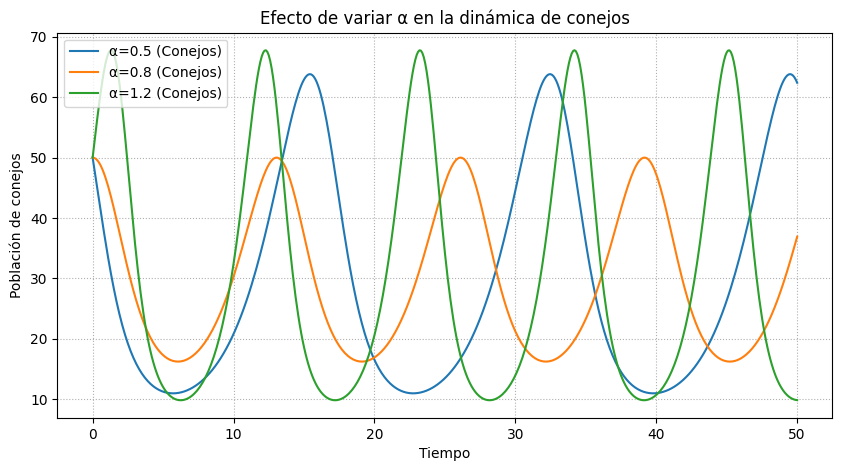

In [5]:

alpha = 0.8
beta  = 0.04
gamma = 0.3
delta = 0.01


x0, y0 = 50, 20
t0, tf = 0, 50


def f(t, X):
    x, y = X
    dx = alpha*x - beta*x*y
    dy = -gamma*y + delta*x*y
    return np.array([dx, dy])


def euler(f, t0, tf, h, X0):
    t_vals = np.arange(t0, tf+h, h)
    X_vals = np.zeros((len(t_vals), len(X0)))
    X_vals[0] = X0
    for i in range(len(t_vals)-1):
        X_vals[i+1] = X_vals[i] + h*f(t_vals[i], X_vals[i])
    return t_vals, X_vals

def rk2(f, t0, tf, h, X0):
    t_vals = np.arange(t0, tf+h, h)
    X_vals = np.zeros((len(t_vals), len(X0)))
    X_vals[0] = X0
    for i in range(len(t_vals)-1):
        k1 = f(t_vals[i], X_vals[i])
        k2 = f(t_vals[i] + h/2, X_vals[i] + h*k1/2)
        X_vals[i+1] = X_vals[i] + h*k2
    return t_vals, X_vals

def rk4(f, t0, tf, h, X0):
    t_vals = np.arange(t0, tf+h, h)
    X_vals = np.zeros((len(t_vals), len(X0)))
    X_vals[0] = X0
    for i in range(len(t_vals)-1):
        k1 = f(t_vals[i], X_vals[i])
        k2 = f(t_vals[i] + h/2, X_vals[i] + h*k1/2)
        k3 = f(t_vals[i] + h/2, X_vals[i] + h*k2/2)
        k4 = f(t_vals[i] + h,   X_vals[i] + h*k3)
        X_vals[i+1] = X_vals[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t_vals, X_vals


h = 0.1
t_euler, X_euler = euler(f, t0, tf, h, [x0, y0])
t_rk2,   X_rk2   = rk2(f, t0, tf, h, [x0, y0])
t_rk4,   X_rk4   = rk4(f, t0, tf, h, [x0, y0])


error_euler = np.linalg.norm(X_euler - X_rk4, axis=1) / np.linalg.norm(X_rk4, axis=1)
error_rk2   = np.linalg.norm(X_rk2 - X_rk4, axis=1)   / np.linalg.norm(X_rk4, axis=1)


plt.figure(figsize=(10,5))
plt.plot(t_rk4, X_rk4[:,0], 'k-', label="Conejos RK4")
plt.plot(t_rk4, X_rk4[:,1], 'k--', label="Zorros RK4")
plt.plot(t_euler, X_euler[:,0], 'r--', alpha=0.6, label="Conejos Euler")
plt.plot(t_euler, X_euler[:,1], 'r:', alpha=0.6, label="Zorros Euler")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución temporal (Euler vs RK4)")
plt.legend()
plt.grid(True, ls=":")
plt.show()


plt.figure(figsize=(6,6))
plt.plot(X_rk4[:,0], X_rk4[:,1], 'k-', label="RK4")
plt.plot(X_euler[:,0], X_euler[:,1], 'r--', label="Euler")
plt.xlabel("Conejos (x)")
plt.ylabel("Zorros (y)")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True, ls=":")
plt.show()


plt.figure(figsize=(10,5))
plt.plot(t_euler, error_euler, 'r--', label="Euler")
plt.plot(t_rk2, error_rk2, 'b--', label="RK2")
plt.xlabel("Tiempo")
plt.ylabel("Error relativo (vs RK4)")
plt.yscale("log")
plt.title("Error relativo de Euler y RK2 respecto a RK4")
plt.legend()
plt.grid(True, ls=":")
plt.show()


for h in [0.5, 0.05]:
    t_e, X_e = euler(f, t0, tf, h, [x0, y0])
    t_r, X_r = rk4(f, t0, tf, h, [x0, y0])
    plt.figure(figsize=(8,5))
    plt.plot(t_r, X_r[:,0], 'k-', label=f"Conejos RK4 h={h}")
    plt.plot(t_e, X_e[:,0], 'r--', label=f"Conejos Euler h={h}")
    plt.xlabel("Tiempo")
    plt.ylabel("Población de conejos")
    plt.title(f"Comparación de estabilidad con h={h}")
    plt.legend()
    plt.grid(True, ls=":")
    plt.show()


alpha_values = [0.5, 0.8, 1.2]
plt.figure(figsize=(10,5))
for a in alpha_values:
    def f_alpha(t, X):
        x, y = X
        dx = a*x - beta*x*y
        dy = -gamma*y + delta*x*y
        return np.array([dx, dy])
    t, X = rk4(f_alpha, t0, tf, 0.1, [x0, y0])
    plt.plot(t, X[:,0], label=f"α={a} (Conejos)")
plt.xlabel("Tiempo")
plt.ylabel("Población de conejos")
plt.title("Efecto de variar α en la dinámica de conejos")
plt.legend()
plt.grid(True, ls=":")
plt.show()


El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

d2xdt2+γdxdt+ω20x=Fm,
donde γ
 es la constante de amortiguamiento, ω0=k/m−−−−√
 es la frecuencia angular natural, m
 es la masa y F
 es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

dxdt=v
dvdt=Fm−γv−ω20x
que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

E=12mv2+12kx2,
Considere x(0)=0
 y v(0)=1
. Grafique x(t)
 y E(t)
 para los siguientes casos:

F=0
 y para γ=[0,0.05,0.3]
.
γ=0
, F=F0cos(ωt) e−t2/T2
 con F0=1N
, T=10s
 y ω=[0,0.8ω0,ω0]


<>:50: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:75: SyntaxWarning: invalid escape sequence '\o'
<>:86: SyntaxWarning: invalid escape sequence '\o'
<>:50: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:75: SyntaxWarning: invalid escape sequence '\o'
<>:86: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-2681858127.py:50: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(t, x, label=f"$\gamma$ = {gamma}")
/tmp/ipython-input-2681858127.py:61: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(t, E, label=f"$\gamma$ = {gamma}")
/tmp/ipython-input-2681858127.py:75: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, x, label=f"$\omega$ = {round(w,2)}")
/tmp/ipython-input-2681858127.py:86: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t, E, label=f"$\omega$ = {round(w,2)}")


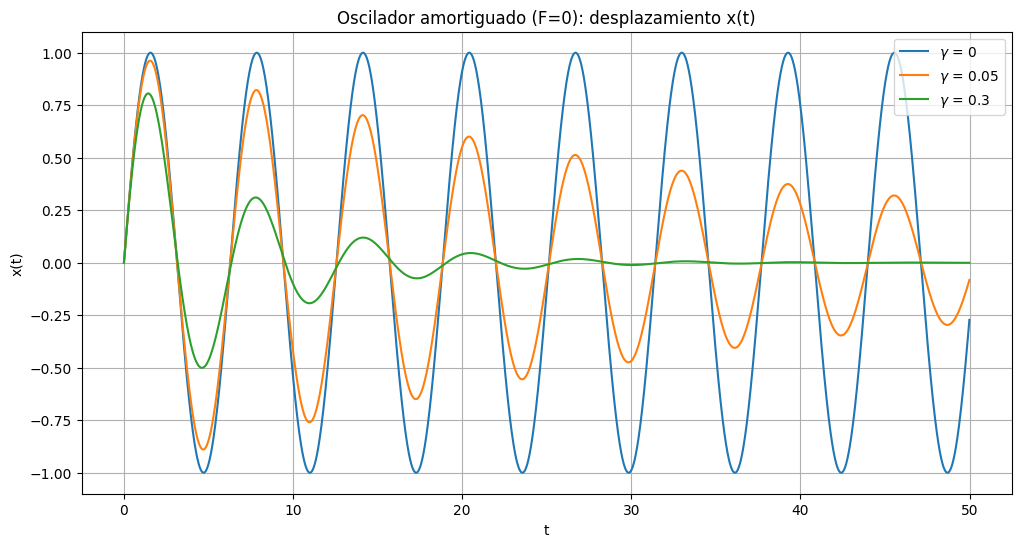

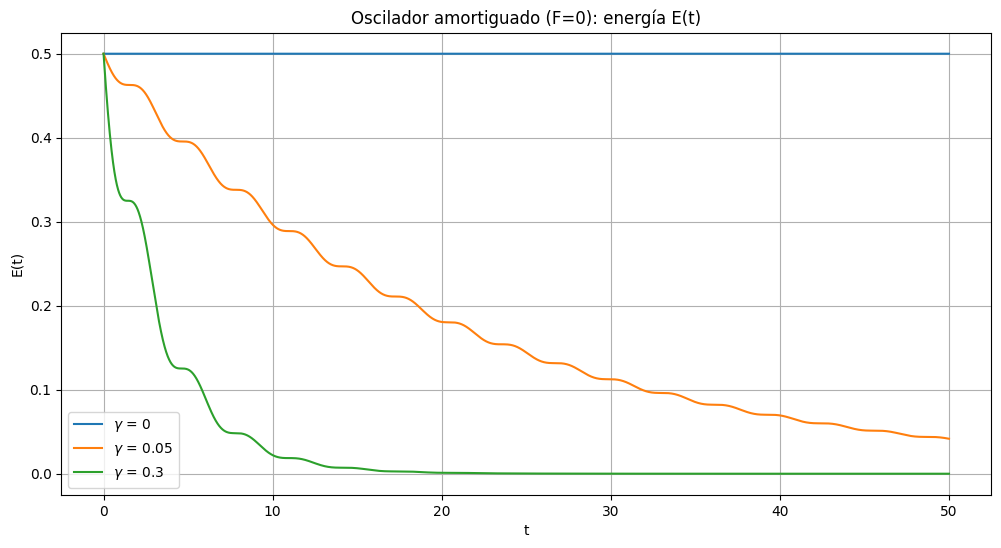

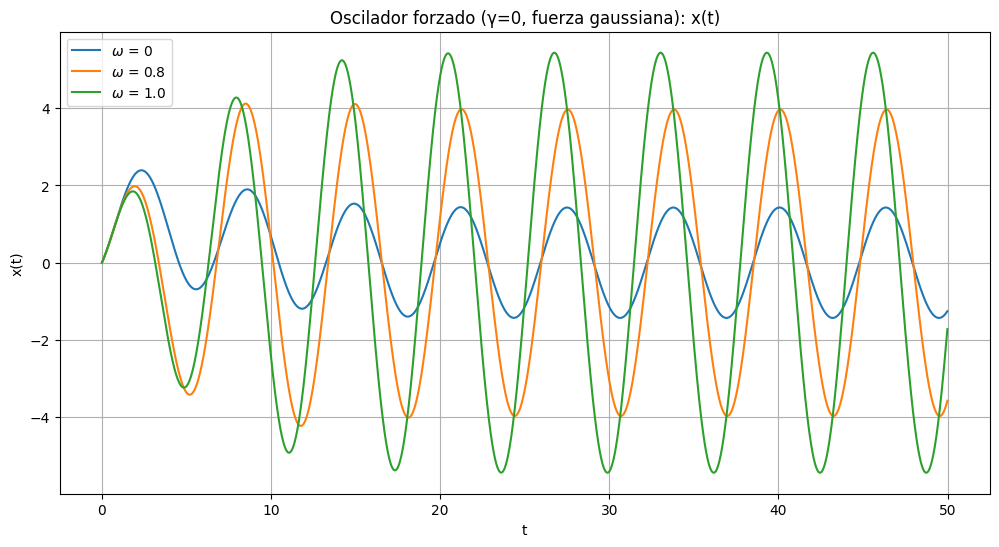

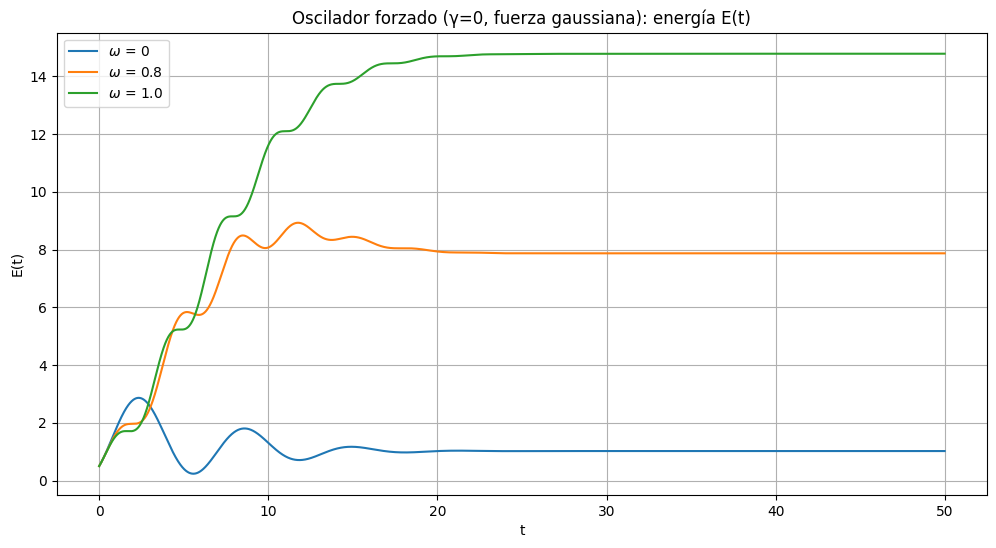

In [6]:

m = 1.0
k = 1.0
omega0 = np.sqrt(k/m)

x0 = 0.0
v0 = 1.0


t0, tf, h = 0, 50, 0.01
t = np.arange(t0, tf, h)


def fuerza_externa(t, caso, F0=1.0, T=10, omega=omega0):
    if caso == 1:
        return 0
    elif caso == 2:
        return F0 * np.cos(omega*t) * np.exp(-t**2 / T**2)

def deriv(y, t, gamma, caso, F0=1.0, T=10, omega=omega0):
    x, v = y
    dxdt = v
    dvdt = (fuerza_externa(t, caso, F0, T, omega) - gamma*v - omega0**2 * x) / m
    return np.array([dxdt, dvdt])

def rk4_step(y, t, h, gamma, caso, F0=1.0, T=10, omega=omega0):
    k1 = deriv(y, t, gamma, caso, F0, T, omega)
    k2 = deriv(y + 0.5*h*k1, t + 0.5*h, gamma, caso, F0, T, omega)
    k3 = deriv(y + 0.5*h*k2, t + 0.5*h, gamma, caso, F0, T, omega)
    k4 = deriv(y + h*k3, t + h, gamma, caso, F0, T, omega)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def integrar(gamma, caso, F0=1.0, T=10, omega=omega0):
    y = np.array([x0, v0])
    xs, vs = [], []
    for ti in t:
        xs.append(y[0])
        vs.append(y[1])
        y = rk4_step(y, ti, h, gamma, caso, F0, T, omega)
    xs, vs = np.array(xs), np.array(vs)

    E = 0.5*m*vs**2 + 0.5*k*xs**2
    return xs, vs, E


gammas = [0, 0.05, 0.3]

plt.figure(figsize=(12,6))
for gamma in gammas:
    x, v, E = integrar(gamma, caso=1)
    plt.plot(t, x, label=f"$\gamma$ = {gamma}")
plt.title("Oscilador amortiguado (F=0): desplazamiento x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
for gamma in gammas:
    x, v, E = integrar(gamma, caso=1)
    plt.plot(t, E, label=f"$\gamma$ = {gamma}")
plt.title("Oscilador amortiguado (F=0): energía E(t)")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()
plt.grid()
plt.show()


omegas = [0, 0.8*omega0, omega0]

plt.figure(figsize=(12,6))
for w in omegas:
    x, v, E = integrar(gamma=0, caso=2, F0=1.0, T=10, omega=w)
    plt.plot(t, x, label=f"$\omega$ = {round(w,2)}")
plt.title("Oscilador forzado (γ=0, fuerza gaussiana): x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
for w in omegas:
    x, v, E = integrar(gamma=0, caso=2, F0=1.0, T=10, omega=w)
    plt.plot(t, E, label=f"$\omega$ = {round(w,2)}")
plt.title("Oscilador forzado (γ=0, fuerza gaussiana): energía E(t)")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.legend()
plt.grid()
plt.show()



El problema restringido de tres cuerpos describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos m1
 y m2
, que orbitan en trayectorias circulares alrededor de su centro de masa.

Definimos el parámetro de masa μ
 como:
μ≡m2m1+m2,con0<μ≤12

Si tomamos un sistema de referencia rotante con velocidad angular ω
, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el potencial efectivo U
 puede escribirse como:
U=−μr1−1−μr2−12ω2(x2+y2)
donde r1
 y r2
 son las distancias del cuerpo de prueba a m1
 y m2
 respectivamente:
r1=(x+μ)2+y2−−−−−−−−−−−√,r2=(x−1+μ)2+y2−−−−−−−−−−−−−−√

Las ecuaciones de movimiento de la partícula testigo son:
x¨−2ωy˙=∂U∂x,y¨+2ωx˙=∂U∂y,

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y ω2=1
, existen cinco puntos de Lagrange (L1,L2,L3,L4,L5)
 donde las fuerzas se equilibran.

Los puntos triangulares L4
 y L5
 forman un triángulo equilátero con los cuerpos principales. Si colocamos m1
 en (−μ,0)
 y m2
 en (1−μ,0)
 en el sistema rotante, las coordenadas de L4
 y L5
 son:

L4=(12−μ,3–√2),L5=(12−μ,−3–√2).
Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:

r1=r2.
Para estudiar la estabilidad de L4
 y L5
, introducimos pequeñas perturbaciones. Por ejemplo, alrededor de L4
:

x=xL4+ξ,y=yL4+η.
Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en serie de Taylor hasta primer orden en ξ
 y η
, obtenemos el sistema de ecuaciones linealizado:

ddt⎡⎣⎢⎢⎢⎢ξξ˙ηη˙⎤⎦⎥⎥⎥⎥=A⎡⎣⎢⎢⎢⎢ξξ˙ηη˙⎤⎦⎥⎥⎥⎥,
donde la matriz A
 tiene la forma:

A=⎡⎣⎢⎢⎢0a0c100−2ω0b0d02ω10⎤⎦⎥⎥⎥.
Los coeficientes de la matriz A
 están dados por las segundas derivadas parciales del potencial efectivo U
 evaluadas en L4
:

a=∂2U∂x2(L4),b=∂2U∂x∂y(L4),
c=∂2U∂y∂x(L4),d=∂2U∂y2(L4).
Esto mismo se hace para L5
. Luego, la estabilidad de L4
 y L5
 se determina analizando los valores propios de la matriz A
. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.

Encuentre los valores propios de la matriz A
 y analice su estabilidad.
Determine el valor crítico de μc
 que garantiza la estabilidad de Li
 con i=4,5
 para esto varie μ
 y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado criterio de Routh
μ<μc≈0.03852.
Finalmente, examine la estabilidad de L4
 y L5
 para el caso del Sol y la Tierra, o el Sol y Jupite

Resultado numérico (barrido):
  No se encontró cruce en el rango explorado.
Criterio de Routh (valor de referencia): mu_c ≈ 0.03852


/tmp/ipython-input-2701002130.py:123: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


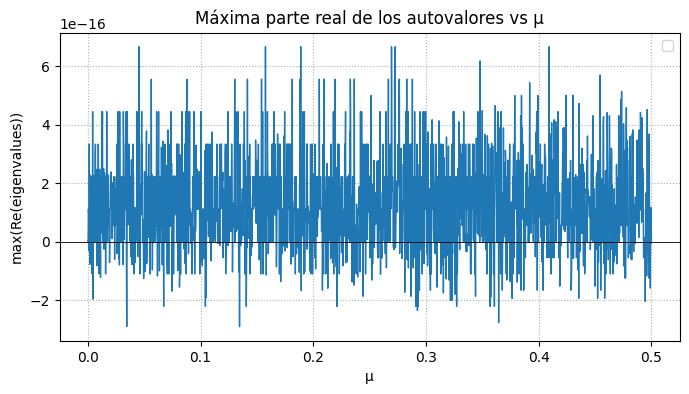

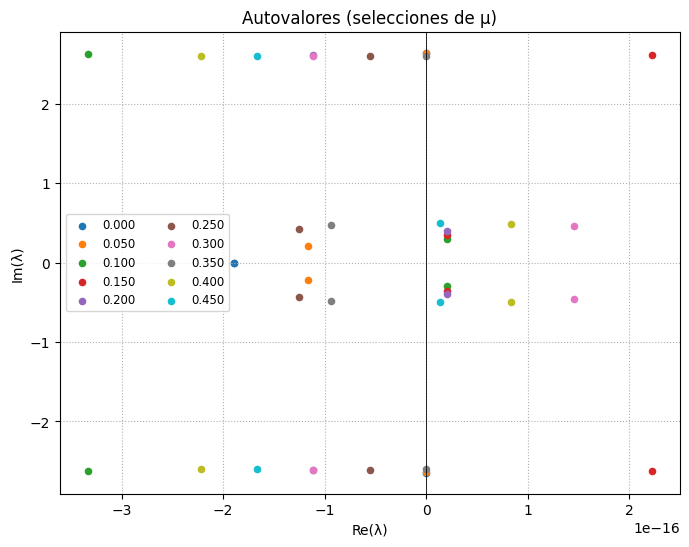


Autovalores para μ de interés:
 μ = 0.000001 -> eigenvalues:
   -1.888456e-16 -9.819801e-04j
   -1.888456e-16 +9.819801e-04j
   +0.000000e+00 -2.645751e+00j
   +0.000000e+00 +2.645751e+00j

 μ = 0.010000 -> eigenvalues:
   -4.440892e-16 -2.643944e+00j
   -4.440892e-16 +2.643944e+00j
   +7.925518e-17 -9.777261e-02j
   +7.925518e-17 +9.777261e-02j

 μ = 0.030000 -> eigenvalues:
   -1.110223e-16 -2.640422e+00j
   -1.110223e-16 +2.640422e+00j
   -9.454243e-17 -1.678515e-01j
   -9.454243e-17 +1.678515e-01j

 μ = 0.038500 -> eigenvalues:
   +9.454243e-17 -1.894191e-01j
   +9.454243e-17 +1.894191e-01j
   +1.110223e-16 -2.638962e+00j
   +1.110223e-16 +2.638962e+00j

 μ = 0.040000 -> eigenvalues:
   +0.000000e+00 -2.638707e+00j
   +0.000000e+00 +2.638707e+00j
   +1.006140e-16 -1.929418e-01j
   +1.006140e-16 +1.929418e-01j

Par Sistema - μ y estabilidad (según criterio numérico):
  Sol-Earth: μ = 3.003406e-06 -> max Re(λ) = 2.613e-16 -> estable
  Sol-Jupiter: μ = 9.536578e-04 -> max Re(λ) = -7.

In [7]:

from numpy.linalg import eigvals


def L4_coords(mu):
    """Coordenadas de L4 en unidades adimensionales."""
    xL = 0.5 - mu
    yL = np.sqrt(3)/2
    return xL, yL

def r_and_diffs(x, y, mu):
    """
    Distancias r1, r2 y deltas (x-xi, y-yi) para m1 en (-mu,0) y m2 en (1-mu,0).
    m1 = 1-mu, m2 = mu
    """
    x1, y1 = -mu, 0.0
    x2, y2 = 1 - mu, 0.0
    dx1 = x - x1
    dy1 = y - y1
    dx2 = x - x2
    dy2 = y - y2
    r1 = np.hypot(dx1, dy1)
    r2 = np.hypot(dx2, dy2)
    return (r1, r2, dx1, dy1, dx2, dy2)


def second_derivatives_U_at_L4(mu):
    xL, yL = L4_coords(mu)
    r1, r2, dx1, dy1, dx2, dy2 = r_and_diffs(xL, yL, mu)
    m1 = 1.0 - mu
    m2 = mu

    r1_5 = r1**5
    r2_5 = r2**5

    Uxx = 0.0
    Uyy = 0.0
    Uxy = 0.0


    Uxx += -m1 * (3*dx1*dx1 - r1*r1) / r1_5
    Uyy += -m1 * (3*dy1*dy1 - r1*r1) / r1_5
    Uxy += -m1 * (3*dx1*dy1) / r1_5


    Uxx += -m2 * (3*dx2*dx2 - r2*r2) / r2_5
    Uyy += -m2 * (3*dy2*dy2 - r2*r2) / r2_5
    Uxy += -m2 * (3*dx2*dy2) / r2_5

    Uxx += -1.0
    Uyy += -1.0


    return Uxx, Uxy, Uxy, Uyy



def matrix_A(mu, omega=1.0):
    Uxx, Uxy, Uyx, Uyy = second_derivatives_U_at_L4(mu)
    A = np.array([
        [0.0,    1.0,   0.0,   0.0],
        [Uxx,    0.0,  Uxy,   2.0*omega],
        [0.0,    0.0,   0.0,   1.0],
        [Uyx, -2.0*omega, Uyy,  0.0]
    ])
    return A


def eigenvalues_at_mu(mu):
    A = matrix_A(mu, omega=1.0)
    vals = eigvals(A)

    return np.sort_complex(vals)


mu_vals = np.linspace(1e-6, 0.5, 2000)
max_real_parts = np.zeros_like(mu_vals)

eig_samples = []

for i, mu in enumerate(mu_vals):
    vals = eigenvalues_at_mu(mu)
    max_real_parts[i] = np.max(np.real(vals))
    if i % 200 == 0:
        eig_samples.append((mu, vals))


tol = 1e-8
idx = np.where(max_real_parts > tol)[0]
mu_c_approx = None
if len(idx) > 0:
    i0 = idx[0]

    a = mu_vals[max(i0-1, 0)]
    b = mu_vals[i0]
    for _ in range(40):
        mid = 0.5*(a+b)
        if np.max(np.real(eigenvalues_at_mu(mid))) > 0:
            b = mid
        else:
            a = mid
    mu_c_approx = 0.5*(a+b)
else:

    mu_c_approx = None

print("Resultado numérico (barrido):")
if mu_c_approx is not None:
    print(f"  mu_crit (aprox) = {mu_c_approx:.6f}")
else:
    print("  No se encontró cruce en el rango explorado.")

print("Criterio de Routh (valor de referencia): mu_c ≈ 0.03852")


plt.figure(figsize=(8,4))
plt.plot(mu_vals, max_real_parts, '-', lw=1)
if mu_c_approx is not None:
    plt.axvline(mu_c_approx, color='r', ls='--', label=f'μ_crit ≈ {mu_c_approx:.5f}')
plt.axhline(0, color='k', lw=0.6)
plt.xlabel('μ')
plt.ylabel('max(Re(eigenvalues))')
plt.title('Máxima parte real de los autovalores vs μ')
plt.legend()
plt.grid(True, ls=':')
plt.show()


plt.figure(figsize=(8,6))
for mu, vals in eig_samples:
    plt.scatter(np.real(vals), np.imag(vals), s=20, label=f'{mu:.3f}')
plt.axvline(0, color='k', lw=0.6)
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.title('Autovalores (selecciones de μ)')
plt.grid(True, ls=':')
plt.legend(fontsize='small', ncol=2)
plt.show()


mus_of_interest = [1e-6, 0.01, 0.03, 0.0385, 0.04]
print("\nAutovalores para μ de interés:")
for mu in mus_of_interest:
    vals = eigenvalues_at_mu(mu)
    print(f" μ = {mu:.6f} -> eigenvalues:")
    for v in vals:
        print(f"   {v.real:+.6e} {v.imag:+.6e}j")
    print("")


m_sun = 1.98847e30
m_earth = 5.9722e24
m_jupiter = 1.89813e27

mu_sun_earth = m_earth / (m_sun + m_earth)
mu_sun_jup   = m_jupiter / (m_sun + m_jupiter)

print("Par Sistema - μ y estabilidad (según criterio numérico):")
for name, mu in [("Sol-Earth", mu_sun_earth), ("Sol-Jupiter", mu_sun_jup)]:
    vals = eigenvalues_at_mu(mu)
    max_re = np.max(np.real(vals))
    stable = (max_re <= 1e-10)
    print(f"  {name}: μ = {mu:.6e} -> max Re(λ) = {max_re:.3e} -> {'estable' if stable else 'inestable'}")


print("\nResumen:")
if mu_c_approx is not None:
    print(f"  Valor crítico numérico aproximado: μ_c ≈ {mu_c_approx:.6f}")
    print("  Comparación: criterio de Routh μ_c ≈ 0.03852 (muy cercano).")
else:
    print("  No se ha podido estimar μ_c en el rango dado.")

print("  Para Sol-Tierra y Sol-Jupiter, ambos μ << μ_c, por lo que L4/L5 son estables (según linearización).")


En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la ecuación de Jeans en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial Σ(r,t)
 y la velocidad en presencia de la auto-gravitación del disco.

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:

d2Σdt2+κ2Σ=0,
donde κ
 es la frecuencia de epicíclo, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular. Muchas galaxias espirales presentan una curva de rotación aproximadamente plana a grandes radios, es decir, la velocidad de rotación V(r)
 es aproximadamente constante:

V(r)≈V0.
En este caso, la frecuencia de epicíclo se puede aproximar como:

κ≈2–√Ω,
donde:

Ω=V0r.
Graficar la evolución temporal de Σ(t)
.
Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.
Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.
Σ(t)=Σ(0)cosκt+Σ(0)˙κsinκt
Analizar cómo cambia la estabilidad del sistema al modificar κ
.

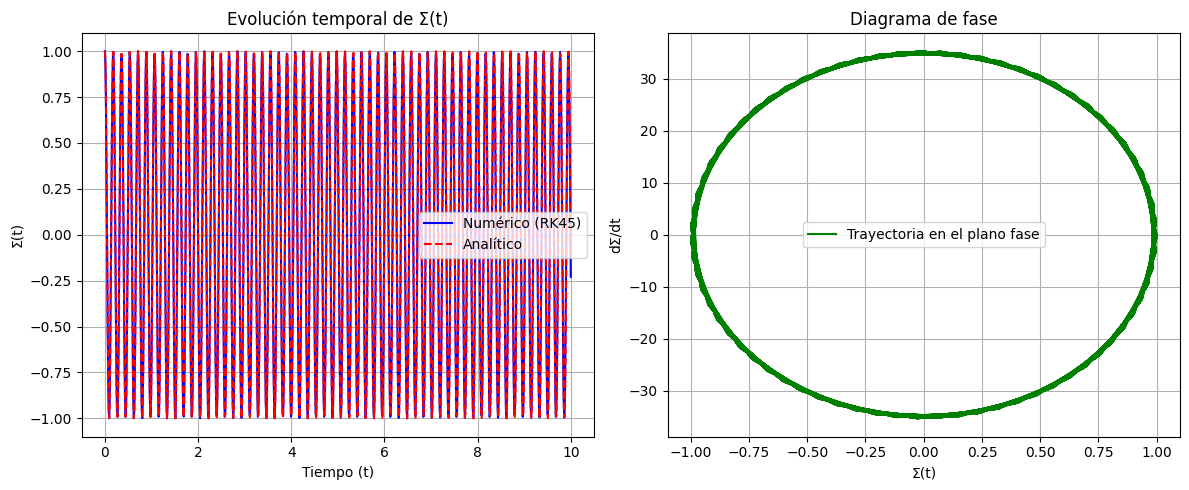

Autovalores del sistema: [0.+35.35533906j 0.-35.35533906j]
Parte real de autovalores: [0. 0.]
Parte imaginaria de autovalores: [ 35.35533906 -35.35533906]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import eigvals


V0 = 200
r = 8.0
Omega = V0 / r
kappa = np.sqrt(2) * Omega


Sigma0 = 1.0
Sigma_dot0 = 0.0
y0 = [Sigma0, Sigma_dot0]


t_max = 10
t_eval = np.linspace(0, t_max, 1000)


def jeans_eq(t, y):
    Sigma, Sigma_dot = y
    dSigma_dt = Sigma_dot
    dSigma_dot_dt = -kappa**2 * Sigma
    return [dSigma_dt, dSigma_dot_dt]


sol = solve_ivp(jeans_eq, [0, t_max], y0, t_eval=t_eval)


Sigma_analitica = Sigma0 * np.cos(kappa * t_eval) + (Sigma_dot0 / kappa) * np.sin(kappa * t_eval)


A = np.array([[0, 1], [-kappa**2, 0]])
eigenvalues = eigvals(A)


plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0], label="Numérico (RK45)", color="b")
plt.plot(t_eval, Sigma_analitica, "--r", label="Analítico")
plt.xlabel("Tiempo (t)")
plt.ylabel("Σ(t)")
plt.title("Evolución temporal de Σ(t)")
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(sol.y[0], sol.y[1], label="Trayectoria en el plano fase", color="g")
plt.xlabel("Σ(t)")
plt.ylabel("dΣ/dt")
plt.title("Diagrama de fase")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


print("Autovalores del sistema:", eigenvalues)
print("Parte real de autovalores:", np.real(eigenvalues))
print("Parte imaginaria de autovalores:", np.imag(eigenvalues))


El método Leapfrog (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
d2xdt2=f(x),
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
dxdt=v,dvdt=f(x).

El método Leapfrog actualiza las variables en pasos intercalados de tiempo (Δt
) mediante las siguientes fórmulas:
vn+1/2=vn−1/2+f(xn)Δt,
xn+1=xn+vn+1/2Δt.

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde f(x)=−ω2x
 con ω=2
 rad/s. Use condiciones iniciales x(0)=1
 y v(0)=0
, y un paso de tiempo Δt=0.01
 s en el intervalo t∈[0,10]
 s.

Nota: La siguiente relación puede ser útil
vn+1/2=vn+12f(xn)Δt

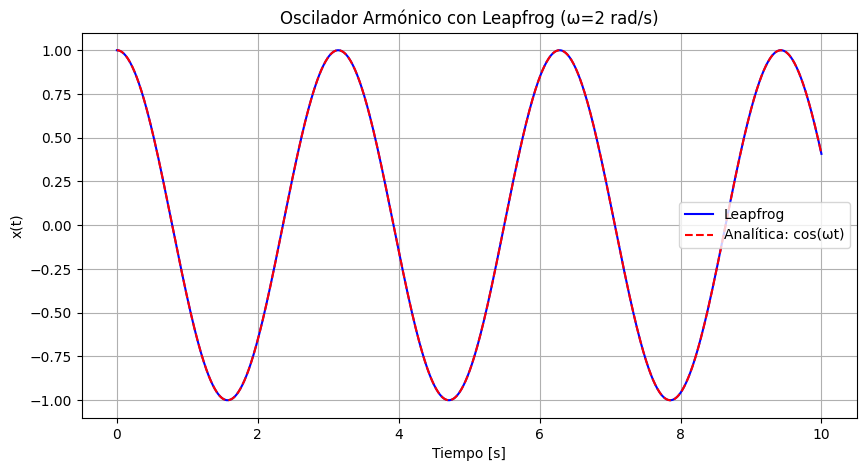

In [9]:

omega = 2.0
dt = 0.01
t_max = 10.0
N = int(t_max / dt)


t = np.linspace(0, t_max, N+1)
x = np.zeros(N+1)
v = np.zeros(N+1)


x[0] = 1.0
v[0] = 0.0


def f(x):
    return -omega**2 * x


v_half = v[0] + 0.5 * f(x[0]) * dt


for n in range(N):

    x[n+1] = x[n] + v_half * dt

    v_half = v_half + f(x[n+1]) * dt

    v[n+1] = v_half - 0.5 * f(x[n+1]) * dt


x_exact = np.cos(omega * t)


plt.figure(figsize=(10,5))
plt.plot(t, x, label="Leapfrog", color="b")
plt.plot(t, x_exact, "--r", label="Analítica: cos(ωt)")
plt.xlabel("Tiempo [s]")
plt.ylabel("x(t)")
plt.title("Oscilador Armónico con Leapfrog (ω=2 rad/s)")
plt.legend()
plt.grid(True)
plt.show()
